In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# Summary of the Notebook

Goal:
1. Data analysis of the dataset
2. Netflix movie recommandation system
3. Imprved Netflix movie recommandation system


In [2]:
path = "../input/netflix-shows/netflix_titles.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


# How many Movies and TV Shows are in the dataset

In [5]:
fig = ['type','show_id']
distribution = data[fig]
distribution = distribution.groupby('type').count()
distribution

,show_id
type,
Movie,4265
TV Show,1969


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7fe6139d2ed0>,
 [Text(-0.6014719407703795, 0.9209948449724967, 'Movie'),
  Text(0.656151114044308, -1.0047217104942112, 'TV Show')],
 [Text(-0.32807560405657055, 0.5023608245304527, '68.4%'),
  Text(0.38275481652584636, -0.5860876644549564, '31.6%')])

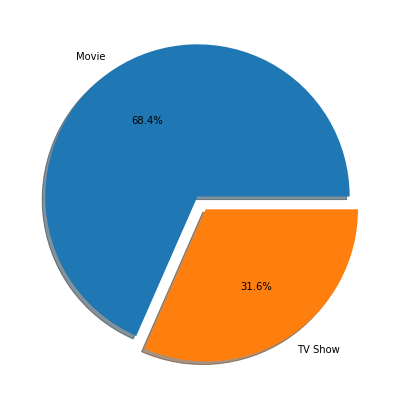

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (7,7))

label = ['Movie','TV Show']

ax.pie(distribution,labels = label, explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)

**Number of contents added in each month**

In [7]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,NaN,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN


In [8]:
fig = ['year_added','type','show_id']
time = data[fig].dropna()
time = time.groupby(['year_added','type']).count().unstack().fillna(0)

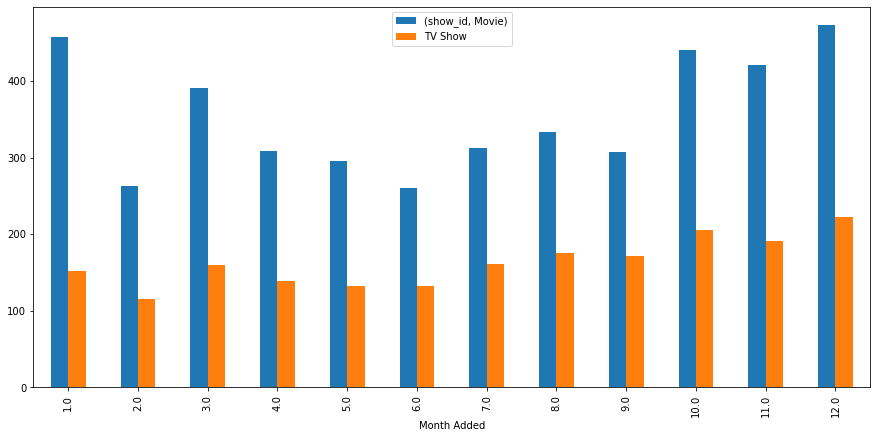

In [9]:
month_fig = ['month_added','type','show_id']
month = data[month_fig]
month = month.groupby(['month_added','type']).count()

fig, ax_month = plt.subplots(figsize = (15, 7))
month.unstack().plot.bar(ax = ax_month)

ax_month.set_xlabel('Month Added')
plt.legend().get_texts()[0].set_text('Movie')
plt.legend().get_texts()[1].set_text('TV Show')

**Nnmber of contents added each year**

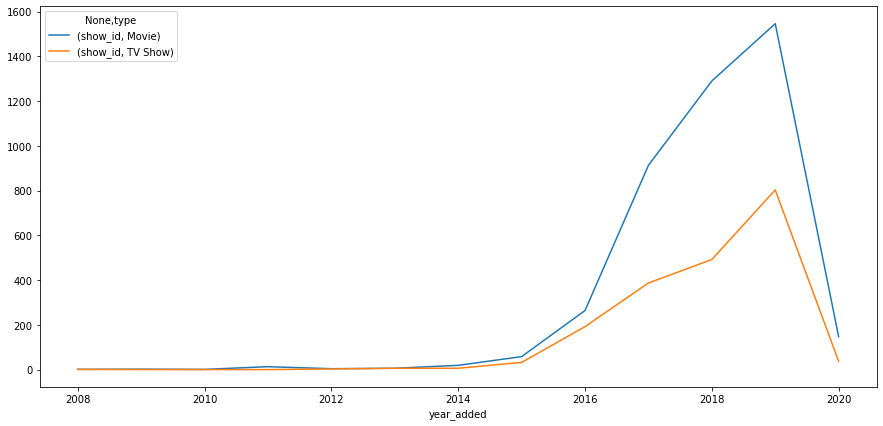

In [10]:
fig, ax_time = plt.subplots(figsize = (15, 7))

time.plot(ax = ax_time)



# Rating

**Number of contents in each rating**

In [11]:
rating_fig = ['type','rating','show_id']
rating = data[rating_fig]
rating = rating.groupby(['rating','type']).count()
rating = rating.rename(columns = {'show_id':'number of content'})
rating

number of content
rating   type                      
G        Movie                   36
         TV Show                  1
NC-17    Movie                    2
NR       Movie                  202
         TV Show                 16
PG       Movie                  183
         TV Show                  1
PG-13    Movie                  286
R        Movie                  506
         TV Show                  2
TV-14    Movie                 1038
         TV Show                660
TV-G     Movie                   80
         TV Show                 69
TV-MA    Movie                 1348
         TV Show                679
TV-PG    Movie                  432
         TV Show                269
TV-Y     Movie                   41
         TV Show                102
TV-Y7    Movie                   69
         TV Show                100
TV-Y7-FV Movie                   27
         TV Show                 68
UR       Movie                    7

Text(0.5, 0, 'Rating')

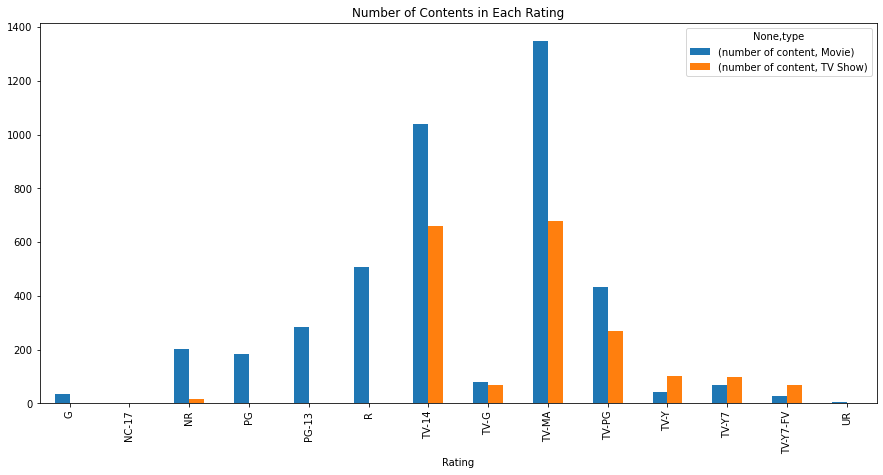

In [12]:
fig, ax_rating = plt.subplots(figsize = (15, 7))
rating.unstack().plot.bar(ax = ax_rating)

ax_rating.set_title('Number of Contents in Each Rating')
ax_rating.set_xlabel('Rating')

# Number of TV Shows with different series

In [13]:
tv_show = data.loc[data['type'] == 'TV Show']
tv_show['series number'] = tv_show['duration'].str.extract(pat = '(\d+)')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
tv_show['series number'] = tv_show['series number'].astype(int)
tv_show.dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


show_id                   int64
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
year_added              float64
month_added             float64
series number             int64
dtype: object

In [15]:
series_fig = ['series number','show_id']
series = tv_show[series_fig]
series = series.rename(columns = {'show_id':'number of countents'})
series

,series number,number of countents
2,1,70234439
3,1,80058654
5,1,80163890
8,1,80117902
26,1,80244601
...,...,...
6228,2,80159925
6229,13,80000063
6230,4,70286564
6232,2,70281022


Text(0.5, 0, 'Number of Series')

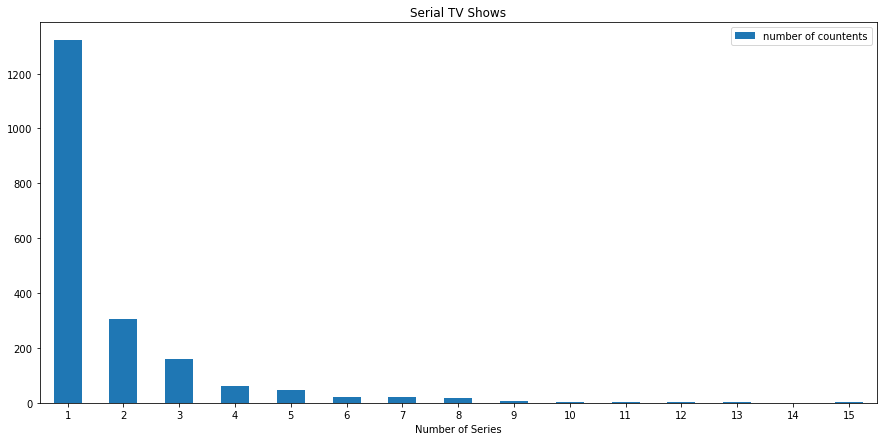

In [16]:
fig, ax_series = plt.subplots(figsize = (15,7))

series.groupby('series number').count().plot.bar(ax = ax_series)
plt.xticks(rotation = 0)
ax_series.set_title('Serial TV Shows')
ax_series.set_xlabel('Number of Series')

# Movie Duration Distribution

In [17]:
movie = data.loc[data['type'] == 'Movie']
movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017.0,9.0
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,2016-04-01,2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,2016.0,4.0
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,2016-04-01,2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,2016.0,4.0
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,2016-04-01,2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,2016.0,4.0
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,2016-04-01,2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...,2016.0,4.0


In [18]:
d_fig = ['show_id','duration']
duration = movie[d_fig]
duration['minute'] = duration['duration'].str.extract(pat = '(\d+)')
duration['minute'] = duration['minute'].astype(int)
duration.dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


show_id      int64
duration    object
minute       int64
dtype: object

In [19]:
duration.groupby('minute').count()

,show_id,duration
minute,,
3,1,1
10,1,1
11,1,1
12,2,2
14,2,2
...,...,...
209,1,1
214,1,1
224,1,1


Text(0.5, 0, 'Movie Duration (minutes)')

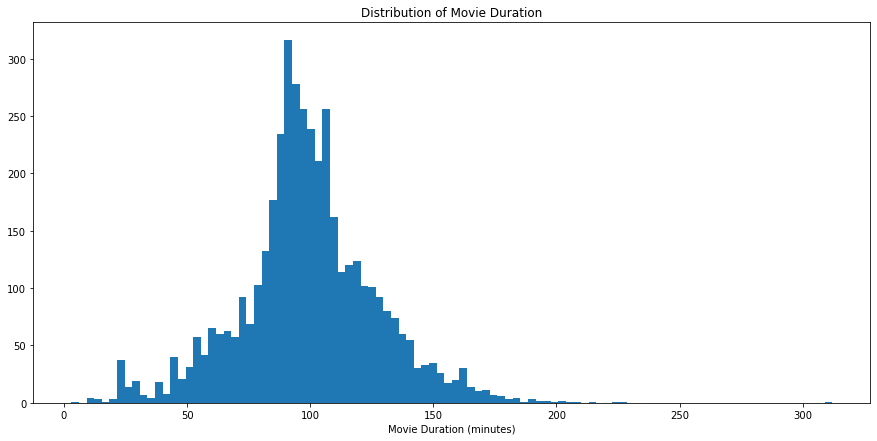

In [20]:
fig, ax_duration1 = plt.subplots(figsize = (15, 7))
x = duration['minute']
x.fillna(0)
plt.hist(x, bins = 100)

ax_duration1.set_title('Distribution of Movie Duration')
ax_duration1.set_xlabel('Movie Duration (minutes)')

Text(0.5, 0, '')

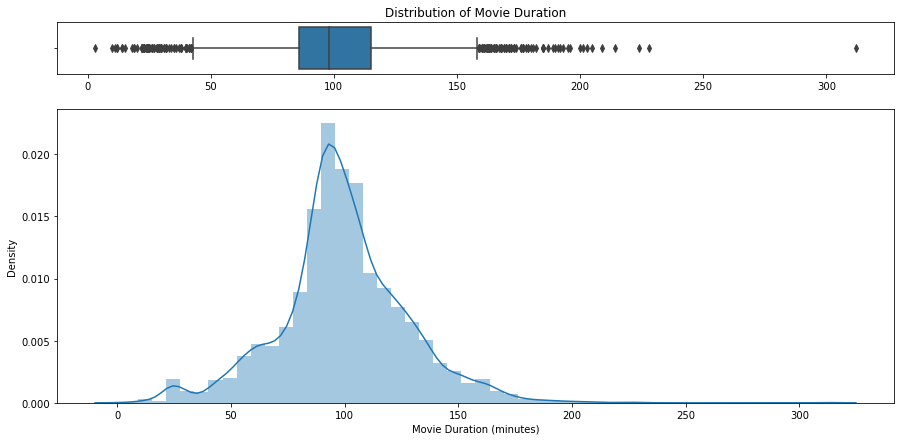

In [21]:
import seaborn as sns
fig, (ax_box, ax_hist) = plt.subplots(2,gridspec_kw = {'height_ratios': (0.15, 0.85)},figsize = (15, 7))
x = duration['minute']
x.fillna(0)

sns.boxplot(x, ax = ax_box)
sns.distplot(x, ax = ax_hist)

ax_box.set_title('Distribution of Movie Duration')
ax_hist.set_xlabel('Movie Duration (minutes)')
ax_hist.set_ylabel('Density')
ax_box.set_xlabel('')

# Recommandation System

Use Consine Symilarity to compare the similarity between the description of each content.

**Consine Similarity:** To compute the similarity of documents irrespective of their siezes.

Using the head of the dataset as an example:

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

test_data = data.head()

In [23]:
count_vectorizer = CountVectorizer(stop_words = 'english')
sparse_matrix = count_vectorizer.fit_transform(test_data['description'])

#Convert Sparse Matrix to Datafram to see the detail of word count in each description:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                 columns = count_vectorizer.get_feature_names(),
                 index = ['0','1','2','3','4'])
df

,allies,archaeologist,artifact,asporaat,attracts,audience,autobot,autobots,awesome,bear,...,riffs,rousing,schooler,serenades,sex,ship,social,stolen,unleashes,wedding
0,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,1,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


The Cosine Similarity between the head of the dataset is shown below:

In [24]:
cosine_similarity(df, df)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.25354628, 0.        ],
       [0.        , 0.        , 0.25354628, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

**Using this idea, we can compute the Cosine Similarity for the whole dataset.**

In [25]:
#Replace null in descriptions with blank:
rec_data = data
rec_data['description'] = rec_data['description'].fillna('')

#Calculate Cosine Similarity for the whole dataset:
count_vectorizer = CountVectorizer(stop_words = 'english')
sparse_matrix = count_vectorizer.fit_transform(rec_data['description'])

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                 columns = count_vectorizer.get_feature_names(),
                 index = rec_data['title'])
df


,000,007,009,10,100,1000,102,10th,11,112,...,zurich,zé,álex,álvaro,émile,ömer,über,łukasz,ōarai,şeref
title,,,,,,,,,,,,,,,,,,,,,
Norm of the North: King Sized Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jandino: Whatever it Takes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Transformers Prime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Transformers: Robots in Disguise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#realityhigh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Maron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Little Baby Bum: Nursery Rhyme Friends,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
series = pd.Series(rec_data.index, index = rec_data['title'])

res = cosine_similarity(df, df)
    

In [27]:
def recommandation(title):
    index = series[title]
    
    score = res[index, :]
    
    score = list(enumerate(score))
    
    score = sorted(score, key = lambda x: x[1], reverse = True)
    score = score[1:11]
    
    movie_index = [i[0] for i in score]
    
    return rec_data['title'].iloc[movie_index]

In [28]:
recommandation('Peaky Blinders')

1753    Once Upon a Time in Mumbaai
2015                       The Fear
4491                            Don
1231                     The Prison
296                   Our Godfather
4481                           Rats
5353                      Abdo Mota
1102          Minecraft: Story Mode
1399                   Paid in Full
2161                Take Your Pills
Name: title, dtype: object

In [29]:
recommandation('Mortel')

6069                                Neo Yokio
5688    Edgar Rice Burroughs' Tarzan and Jane
1761                                Chamatkar
863                       Freedom at Midnight
1838              Anjaan: Special Crimes Unit
2001                                FirstBorn
4332                           At First Light
5307                            Psychokinesis
257                                    Bleach
1585        Handsome: A Netflix Mystery Movie
Name: title, dtype: object

In [30]:
recommandation('Breaking Bad')

3901                      Dismissed
5566    Ouran High School Host Club
5878                       Hormones
6077                  Alexa & Katie
135                         BONDING
3107               Loving Annabelle
5761                        CLANNAD
1344                            187
2276              Kocan Kadar Konus
2773                  1 Mile to You
Name: title, dtype: object

# Improve Recommandation System

We can improve the performance of the system by putting more word into account. A better system should rely on more than the description. 
We need to consider the genre, cast and director. If a TV show has different series, we may consider the title as well.

We can do that by extracting text from 'title', 'director', 'cast', 'listed_in' and 'description', then merge them to form a longer text. 
We can then use the same algorithm to compute the Cosine Similarity of those text and make recommandation based on it.

In [31]:
#Clean null in columns:
fig = ['title','director','cast','listed_in','description']
rec_data[fig] = rec_data[fig].fillna('')

#Merge texts from 5 columns:
rec_data['brief'] = rec_data['description'] + ' ' + rec_data['title'] + ' ' + rec_data['director'] + ' ' + rec_data['cast'] + ' ' + rec_data['listed_in']

#Check the new text:
rec_data.loc[0,'brief']

'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first. Norm of the North: King Sized Adventure Richard Finn, Tim Maltby Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson Children & Family Movies, Comedies'

In [32]:
#Appply the same algorithm to 'brief':
#Calculate Cosine Similarity for the whole dataset:
count_vectorizer = CountVectorizer(stop_words = 'english')
sparse_matrix = count_vectorizer.fit_transform(rec_data['brief'])

doc_term_matrix = sparse_matrix.todense()
new_df = pd.DataFrame(doc_term_matrix,
                 columns = count_vectorizer.get_feature_names(),
                 index = rec_data['title'])
new_df

,000,007,009,01,09,10,100,1000,100kg,101,...,แผนร,忍者ハットリくん,海的儿子,마녀사냥,미니특공대,반드시,영웅의,잡는다,최강전사,탄생
title,,,,,,,,,,,,,,,,,,,,,
Norm of the North: King Sized Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jandino: Whatever it Takes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Transformers Prime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Transformers: Robots in Disguise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#realityhigh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Maron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Little Baby Bum: Nursery Rhyme Friends,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
series = pd.Series(rec_data.index, index = rec_data['title'])

new_res = cosine_similarity(new_df, new_df)

In [34]:
def improved_recommandation(title):
    index = series[title]
    
    score = new_res[index, :]
    
    score = list(enumerate(score))
    
    score = sorted(score, key = lambda x: x[1], reverse = True)
    score = score[1:11]
    
    movie_index = [i[0] for i in score]
    
    return rec_data['title'].iloc[movie_index]

**Now run the old and new recommandation systems and compare the result**

In [35]:
improved_recommandation('Peaky Blinders')

2505                  Kiss Me First
550                       Bodyguard
6050    The Frankenstein Chronicles
5859                   Happy Valley
3465                    Giri / Haji
1248                       Paranoid
2007                     London Spy
1605                 Killer Ratings
5                           Apaches
158                    Criminal: UK
Name: title, dtype: object

In [36]:
recommandation('Peaky Blinders')

1753    Once Upon a Time in Mumbaai
2015                       The Fear
4491                            Don
1231                     The Prison
296                   Our Godfather
4481                           Rats
5353                      Abdo Mota
1102          Minecraft: Story Mode
1399                   Paid in Full
2161                Take Your Pills
Name: title, dtype: object

In [37]:
improved_recommandation('Mortel')

6114            Wanted
692      Stunt Science
1605    Killer Ratings
4131           Glow Up
4306          La Mante
4726          Sintonia
1145             Argon
1571        The Writer
2884    My Hotter Half
1749        I Hear You
Name: title, dtype: object

In [38]:
recommandation('Mortel')

6069                                Neo Yokio
5688    Edgar Rice Burroughs' Tarzan and Jane
1761                                Chamatkar
863                       Freedom at Midnight
1838              Anjaan: Special Crimes Unit
2001                                FirstBorn
4332                           At First Light
5307                            Psychokinesis
257                                    Bleach
1585        Handsome: A Netflix Mystery Movie
Name: title, dtype: object

In [39]:
improved_recommandation('Transformers Prime')

3       Transformers: Robots in Disguise
1786        All Hail King Julien: Exiled
180            Transformers: Rescue Bots
1011                  Green Eggs and Ham
5965            3Below: Tales of Arcadia
1197              Kulipari: Dream Walker
175           Kulipari: An Army of Frogs
5465                        You vs. Wild
6211                 The Minimighty Kids
6124                All Hail King Julien
Name: title, dtype: object

In [40]:
recommandation('Transformers Prime')

3                   Transformers: Robots in Disguise
382     Naruto Shippûden the Movie: The Will of Fire
1423                             The Matrix Reloaded
5410                                  Beyond Skyline
3048                     NOVA: Black Hole Apocalypse
4129                             Banana Island Ghost
1842                                            Darc
2726                                     Singularity
5080                                   Space Cowboys
854                                   Chappaquiddick
Name: title, dtype: object

**From the above result, we can tell that the added columns effect the recommandation system and made changes to some of the results.**